### PART 1

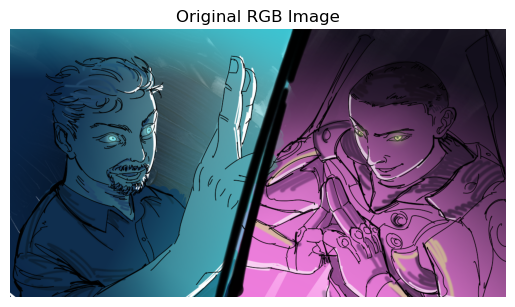

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("C:/Users/nickb/Pictures/image.png")

plt.imshow(img)
plt.axis('off')
plt.title("Original RGB Image")
plt.show()


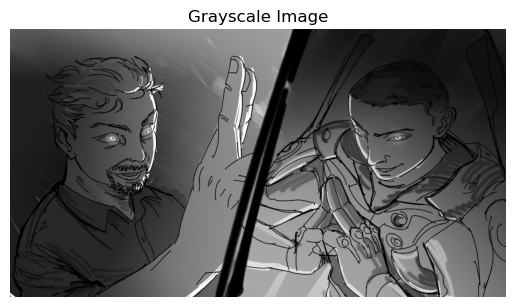

In [3]:
# Convert RGB to Grayscale 
def rgb_to_grayscale(image):
    gray = 0.3 * image[:, :, 0] + 0.6 * image[:, :, 1] + 0.1 * image[:, :, 2]
    return gray

gray_img = rgb_to_grayscale(img)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()


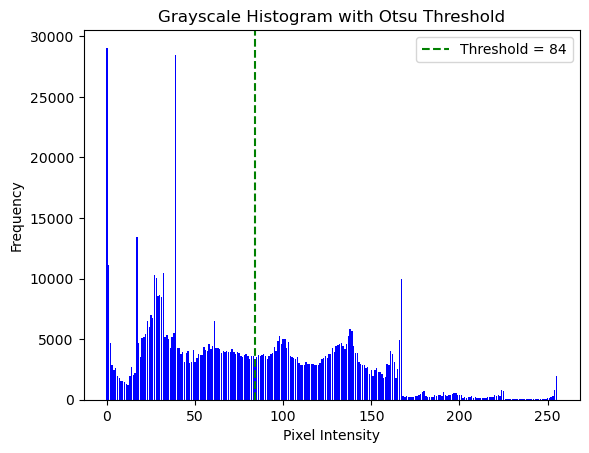

In [4]:
#Histogram and Otsu Threshold
import matplotlib.pyplot as plt

def compute_histogram(image):
    # Ensure grayscale values are integers 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    hist = [0]*256 #for all possible grayscale values 0–255
    for row in img_int: #each row of the image
        for pixel in row: #each pixel in that row
            hist[pixel] += 1
    return hist
    
#otsu thresh
def otsu_threshold(hist, total_pixels):
    max_var = 0
    threshold = 0
    sum_total = sum(i * hist[i] for i in range(256))
    sum_bg = 0
    weight_bg = 0
    
    for t in range(256):
        weight_bg += hist[t]
        if weight_bg == 0:
            continue
        weight_fg = total_pixels - weight_bg
        if weight_fg == 0:
            break
        
        sum_bg += t * hist[t]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg
        
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg)**2
        if var_between > max_var:
            max_var = var_between
            threshold = t
    return threshold

# Compute histogram
hist = compute_histogram(gray_img)
total_pixels = gray_img.shape[0] * gray_img.shape[1]

threshold = otsu_threshold(hist, total_pixels)
plt.bar(range(256), hist, color='blue')
plt.axvline(x=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Grayscale Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### Histogram and Otsu Threshold

1. **Histogram computation (`compute_histogram`):**
   - Converts the grayscale image to integer values between 0–255.
   - Initializes a list of 256 zeros to count the frequency of each intensity.
   - Loops through every pixel in the image and increments the corresponding histogram bin.
   -so the histogram shows how many pixels have each intensity value.

2. **Otsu Threshold calculation (`otsu_threshold`):**
   - Calculates the optimal threshold to separate the image into two classes: foreground (white) and background (black).
   - For each possible threshold `t`:
       - Compute the weight and mean of the background (pixels ≤ t) and foreground (pixels > t).
       - Calculate **between-class variance**, which measures how well the threshold separates the two classes.
   - The threshold that maximizes this variance is chosen as the **Otsu threshold**.

**Observations:**
- The histogram shows the distribution of pixel intensities in the grayscale image.
- Darker areas in the image correspond to the left side (low intensity) of the histogram, and lighter areas correspond to the right side (high intensity).
- The Otsu threshold automatically finds the best intensity to separate light and dark regions.


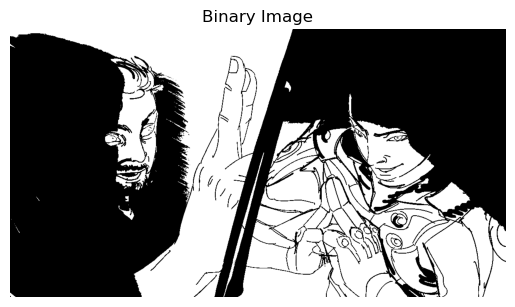

In [5]:
# Convert grayscale to binary using threshold
def grayscale_to_binary(image, threshold):
    # Ensure values are in 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    binary_img = [[1 if pixel > threshold else 0 for pixel in row] for row in img_int]
    return binary_img

binary_img = grayscale_to_binary(gray_img, threshold)

plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()


Lower Threshold (Threshold=64): White = 398101, Black = 351743
Otsu Threshold (Threshold=84): White = 322435, Black = 427409
Higher Threshold (Threshold=104): White = 240432, Black = 509412


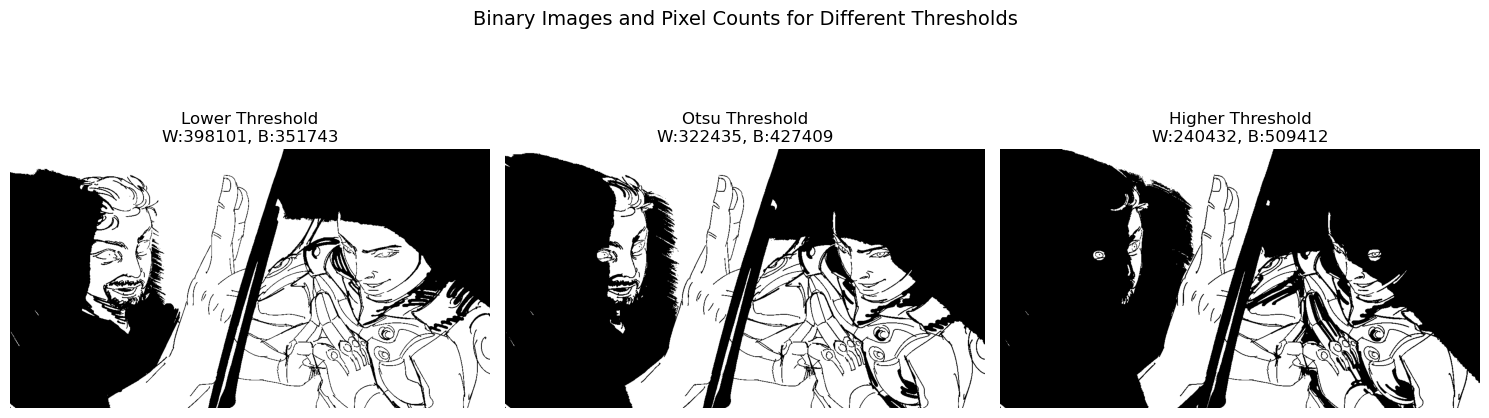

In [6]:
def count_pixels(binary_image):
    white_count = sum(sum(row) for row in binary_image)  # White pixels = 1
    black_count = sum(len(row) - sum(row) for row in binary_image)  # Black pixels = 0
    return white_count, black_count

# Define thresholds: slightly lower, Otsu, slightly higher
thresholds = [max(threshold-20, 0), threshold, min(threshold+20, 255)]
titles = ["Lower Threshold", "Otsu Threshold", "Higher Threshold"]

plt.figure(figsize=(15, 5))

for i, t in enumerate(thresholds):
    # Generate binary image
    temp_binary = grayscale_to_binary(gray_img, t)
    
    white_pixels, black_pixels = count_pixels(temp_binary)
    print(f"{titles[i]} (Threshold={t}): White = {white_pixels}, Black = {black_pixels}")
    
    # Display binary image in a subplot
    plt.subplot(1, 3, i + 1)
    plt.imshow(temp_binary, cmap='gray')
    plt.title(f"{titles[i]}\nW:{white_pixels}, B:{black_pixels}")
    plt.axis('off')


plt.suptitle("Binary Images and Pixel Counts for Different Thresholds", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust spacing so title fits
plt.show()


### Comments on Binary Conversion and Pixel Counts

**What the code does:**

1. **Binary conversion (`grayscale_to_binary`):**
   - Converts the grayscale image to integer values 0–255 if necessary.
   - Compares each pixel to the given threshold:
       - If pixel intensity > threshold → white (1)
       - Else → black (0)
   - Generates a 2D list representing the binary image.

2. **Counting pixels (`count_pixels`):**
   - Loops through the binary image and counts:
       - White pixels: sum of all 1’s
       - Black pixels: total pixels minus sum of 1’s
   - Reports the number of white and black pixels for each threshold.

3. **Threshold comparison:**
   - Tests three thresholds: slightly lower than Otsu, Otsu, and slightly higher.
   

**Observations:**
- **Lower threshold:** More pixels are white because more pixels exceed the threshold.
- **Otsu threshold:** Balanced distribution between black and white pixels, optimal for segmentation.
- **Higher threshold:** More pixels are black because fewer pixels exceed the threshold.

### expreriment with  other images 

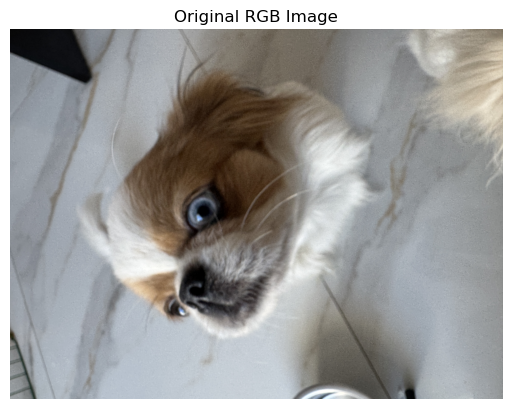

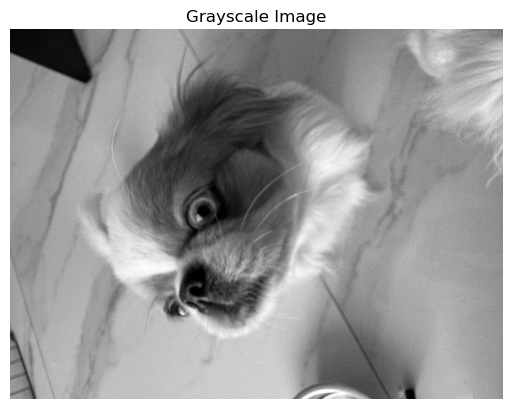

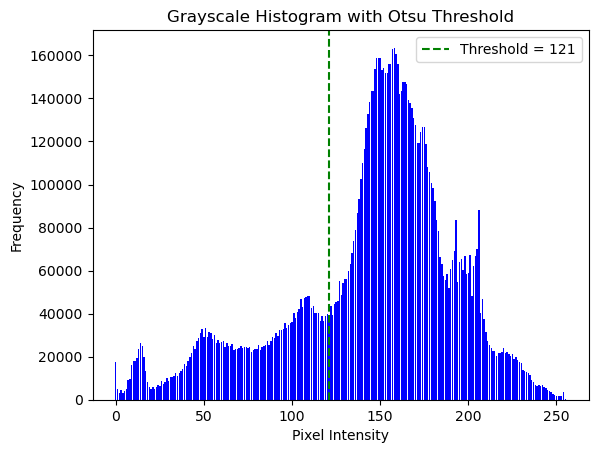

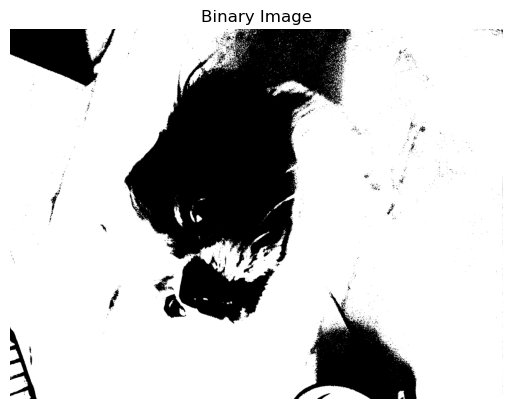

Lower Threshold (Threshold=71): White = 10911645, Black = 1281123
Otsu Threshold (Threshold=121): White = 9224052, Black = 2968716
Higher Threshold (Threshold=201): White = 1074682, Black = 11118086


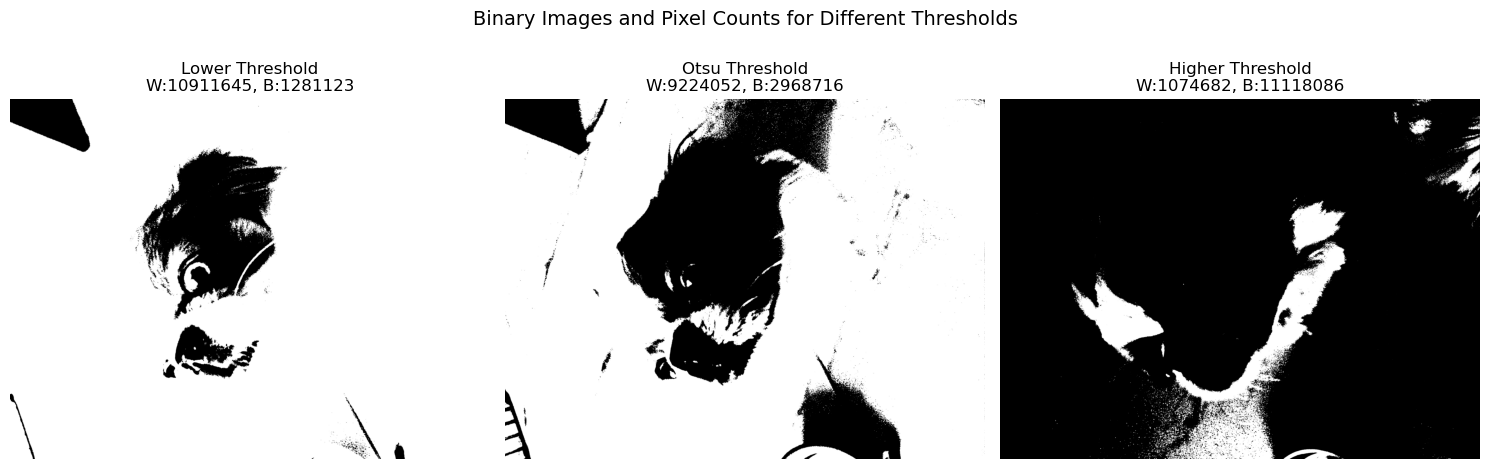

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("C:/Users/nickb/Pictures/34.jpeg")

plt.imshow(img)
plt.axis('off')
plt.title("Original RGB Image")
plt.show()


# Convert RGB to Grayscale 
def rgb_to_grayscale(image):
    gray = 0.3 * image[:, :, 0] + 0.6 * image[:, :, 1] + 0.1 * image[:, :, 2]
    return gray

gray_img = rgb_to_grayscale(img)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()



# Compute Histogram and Otsu Threshold
import matplotlib.pyplot as plt

def compute_histogram(image):
    # Ensure grayscale values are integers 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    hist = [0]*256
    for row in img_int:
        for pixel in row:
            hist[pixel] += 1
    return hist
    
#otsu thresh
def otsu_threshold(hist, total_pixels):
    max_var = 0
    threshold = 0
    sum_total = sum(i * hist[i] for i in range(256))
    sum_bg = 0
    weight_bg = 0
    
    for t in range(256):
        weight_bg += hist[t]
        if weight_bg == 0:
            continue
        weight_fg = total_pixels - weight_bg
        if weight_fg == 0:
            break
        
        sum_bg += t * hist[t]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg
        
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg)**2
        if var_between > max_var:
            max_var = var_between
            threshold = t
    return threshold

# Compute histogram
hist = compute_histogram(gray_img)
total_pixels = gray_img.shape[0] * gray_img.shape[1]

threshold = otsu_threshold(hist, total_pixels)
plt.bar(range(256), hist, color='blue')
plt.axvline(x=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Grayscale Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Convert grayscale to binary using threshold
def grayscale_to_binary(image, threshold):
    # Ensure values are in 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    binary_img = [[1 if pixel > threshold else 0 for pixel in row] for row in img_int]
    return binary_img

binary_img = grayscale_to_binary(gray_img, threshold)

plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()


def count_pixels(binary_image):
    white_count = sum(sum(row) for row in binary_image)  # White pixels = 1
    black_count = sum(len(row) - sum(row) for row in binary_image)  # Black pixels = 0
    return white_count, black_count

#  slightly lower, Otsu, slightly higher
thresholds = [max(threshold-50, 0), threshold, min(threshold+80, 255)]
titles = ["Lower Threshold", "Otsu Threshold", "Higher Threshold"]

plt.figure(figsize=(15, 5))

for i, t in enumerate(thresholds):
    # Generate binary image
    temp_binary = grayscale_to_binary(gray_img, t)
    
    white_pixels, black_pixels = count_pixels(temp_binary)
    print(f"{titles[i]} (Threshold={t}): White = {white_pixels}, Black = {black_pixels}")
    
 
    plt.subplot(1, 3, i + 1)
    plt.imshow(temp_binary, cmap='gray')
    plt.title(f"{titles[i]}\nW:{white_pixels}, B:{black_pixels}")
    plt.axis('off')


plt.suptitle("Binary Images and Pixel Counts for Different Thresholds", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


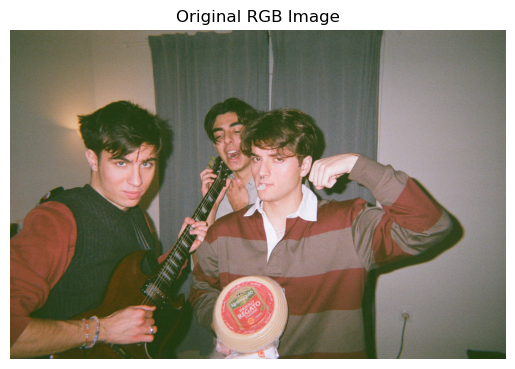

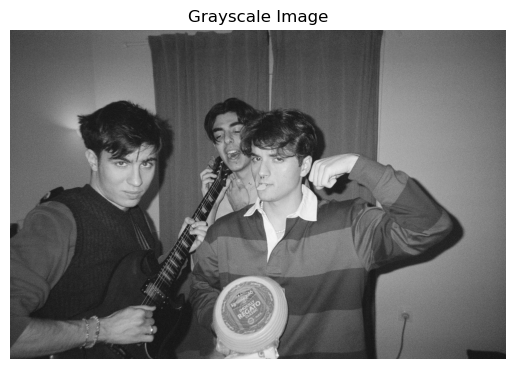

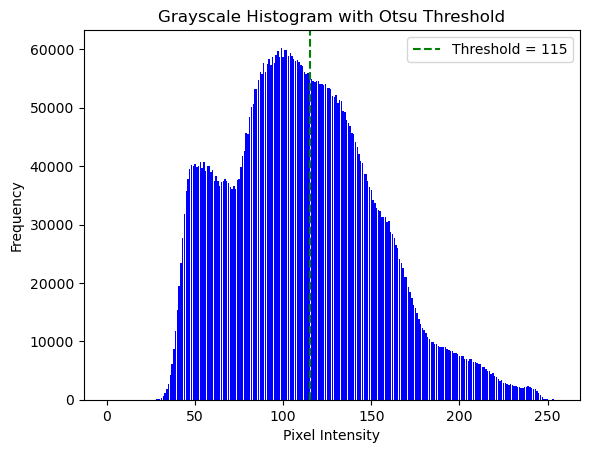

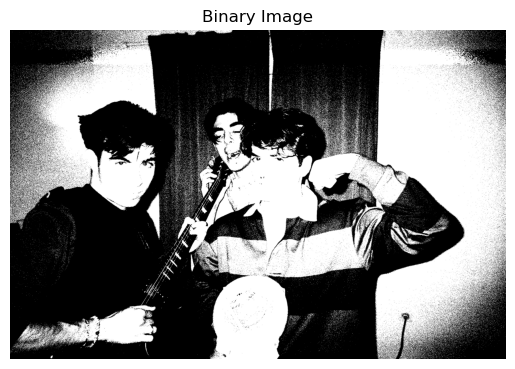

Lower Threshold (Threshold=95): White = 3938164, Black = 2386060
Otsu Threshold (Threshold=115): White = 2774843, Black = 3549381
Higher Threshold (Threshold=135): White = 1717531, Black = 4606693


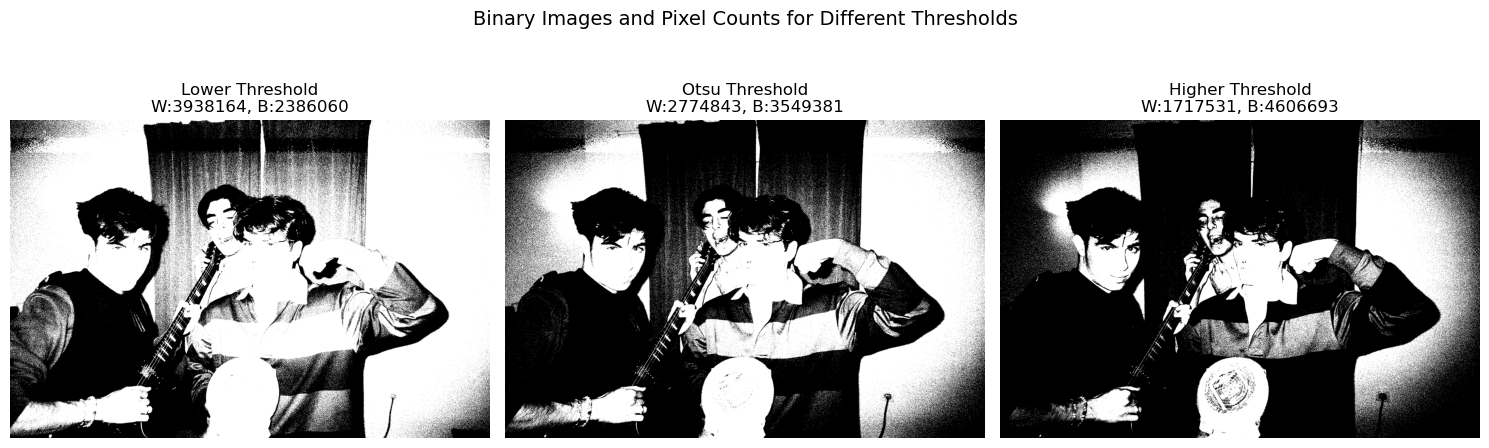

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("C:/Users/nickb/Pictures/guitar.JPG")

plt.imshow(img)
plt.axis('off')
plt.title("Original RGB Image")
plt.show()


# Convert RGB to Grayscale 
def rgb_to_grayscale(image):
    gray = 0.3 * image[:, :, 0] + 0.6 * image[:, :, 1] + 0.1 * image[:, :, 2]
    return gray

gray_img = rgb_to_grayscale(img)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()



# Compute Histogram and Otsu Threshold
import matplotlib.pyplot as plt

def compute_histogram(image):
    # Ensure grayscale values are integers 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    hist = [0]*256
    for row in img_int:
        for pixel in row:
            hist[pixel] += 1
    return hist
    
#otsu thresh
def otsu_threshold(hist, total_pixels):
    max_var = 0
    threshold = 0
    sum_total = sum(i * hist[i] for i in range(256))
    sum_bg = 0
    weight_bg = 0
    
    for t in range(256):
        weight_bg += hist[t]
        if weight_bg == 0:
            continue
        weight_fg = total_pixels - weight_bg
        if weight_fg == 0:
            break
        
        sum_bg += t * hist[t]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg
        
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg)**2
        if var_between > max_var:
            max_var = var_between
            threshold = t
    return threshold

# Compute histogram
hist = compute_histogram(gray_img)
total_pixels = gray_img.shape[0] * gray_img.shape[1]

threshold = otsu_threshold(hist, total_pixels)
plt.bar(range(256), hist, color='blue')
plt.axvline(x=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Grayscale Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Convert grayscale to binary using threshold
def grayscale_to_binary(image, threshold):
    # Ensure values are in 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    binary_img = [[1 if pixel > threshold else 0 for pixel in row] for row in img_int]
    return binary_img

binary_img = grayscale_to_binary(gray_img, threshold)

plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()


def count_pixels(binary_image):
    white_count = sum(sum(row) for row in binary_image)  # White pixels = 1
    black_count = sum(len(row) - sum(row) for row in binary_image)  # Black pixels = 0
    return white_count, black_count

# slightly lower, Otsu, slightly higher
thresholds = [max(threshold-20, 0), threshold, min(threshold+20, 255)]
titles = ["Lower Threshold", "Otsu Threshold", "Higher Threshold"]

plt.figure(figsize=(15, 5))

for i, t in enumerate(thresholds):
    # Generate binary image
    temp_binary = grayscale_to_binary(gray_img, t)
    
    white_pixels, black_pixels = count_pixels(temp_binary)
    print(f"{titles[i]} (Threshold={t}): White = {white_pixels}, Black = {black_pixels}")
    

    plt.subplot(1, 3, i + 1)
    plt.imshow(temp_binary, cmap='gray')
    plt.title(f"{titles[i]}\nW:{white_pixels}, B:{black_pixels}")
    plt.axis('off')


plt.suptitle("Binary Images and Pixel Counts for Different Thresholds", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


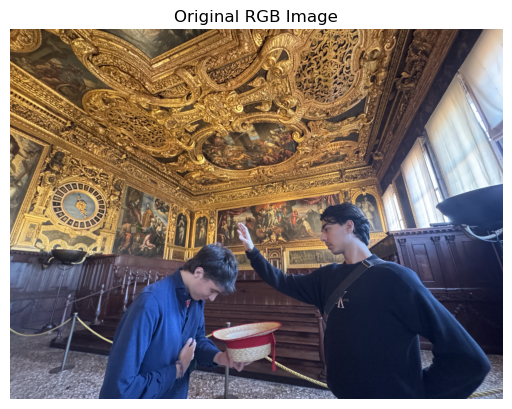

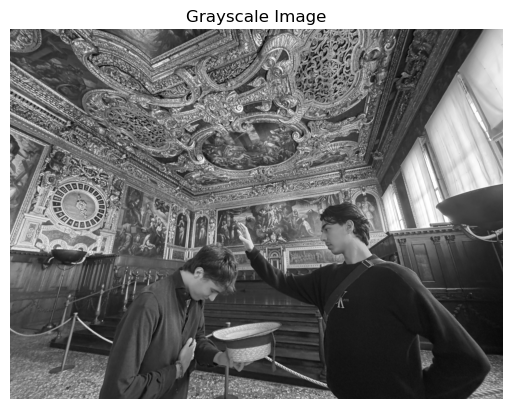

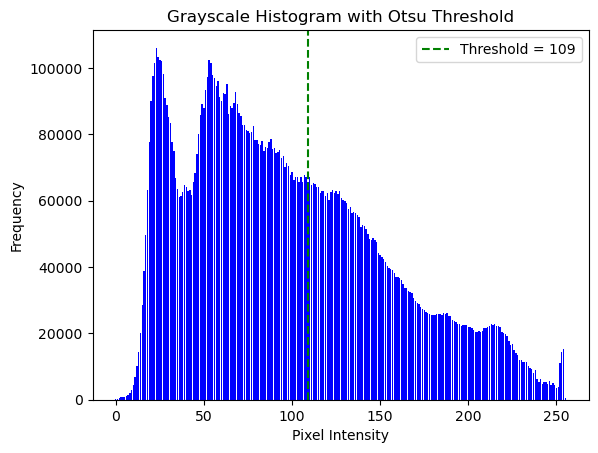

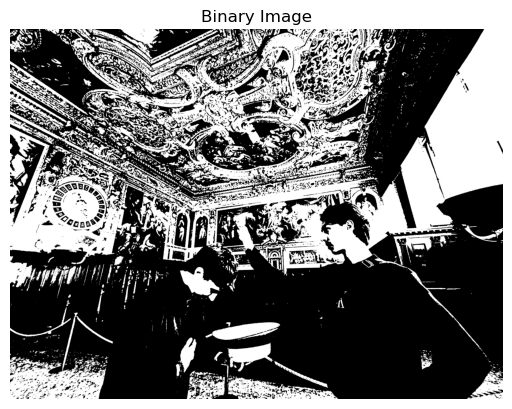

Lower Threshold (Threshold=39): White = 10184649, Black = 2008119
Otsu Threshold (Threshold=109): White = 4620379, Black = 7572389
Higher Threshold (Threshold=179): White = 1283111, Black = 10909657


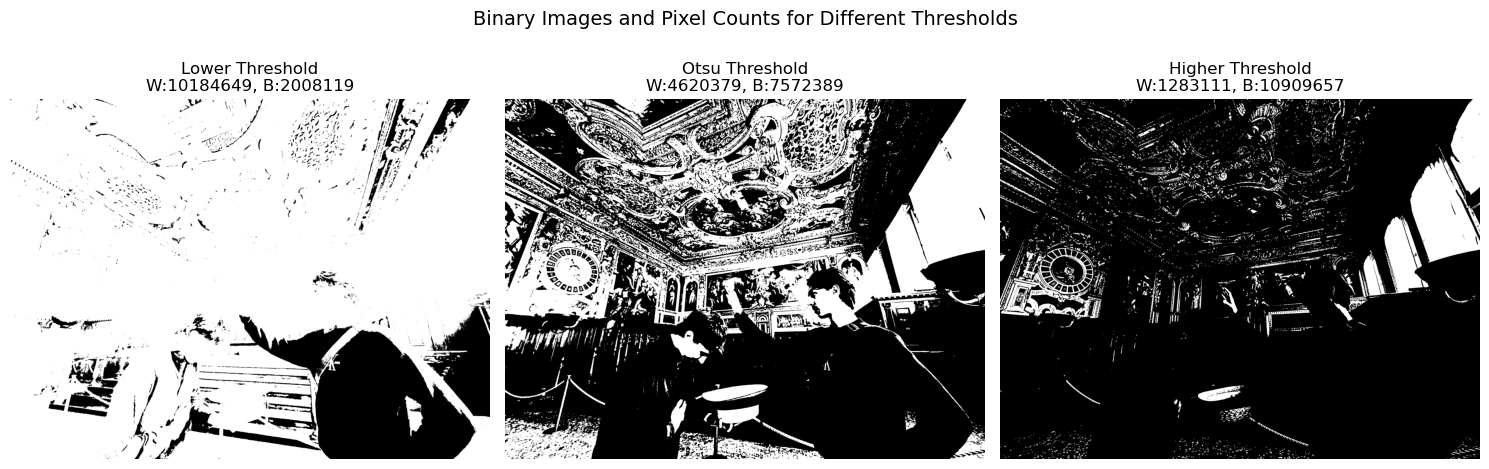

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("C:/Users/nickb/Pictures/venice.jpeg")

plt.imshow(img)
plt.axis('off')
plt.title("Original RGB Image")
plt.show()


# Convert RGB to Grayscale 
def rgb_to_grayscale(image):
    gray = 0.3 * image[:, :, 0] + 0.6 * image[:, :, 1] + 0.1 * image[:, :, 2]
    return gray

gray_img = rgb_to_grayscale(img)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()



# Compute Histogram and Otsu Threshold
import matplotlib.pyplot as plt

def compute_histogram(image):
    # Ensure grayscale values are integers 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    hist = [0]*256
    for row in img_int:
        for pixel in row:
            hist[pixel] += 1
    return hist
    
#otsu thresh
def otsu_threshold(hist, total_pixels):
    max_var = 0
    threshold = 0
    sum_total = sum(i * hist[i] for i in range(256))
    sum_bg = 0
    weight_bg = 0
    
    for t in range(256):
        weight_bg += hist[t]
        if weight_bg == 0:
            continue
        weight_fg = total_pixels - weight_bg
        if weight_fg == 0:
            break
        
        sum_bg += t * hist[t]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg
        
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg)**2
        if var_between > max_var:
            max_var = var_between
            threshold = t
    return threshold

# Compute histogram
hist = compute_histogram(gray_img)
total_pixels = gray_img.shape[0] * gray_img.shape[1]

threshold = otsu_threshold(hist, total_pixels)
plt.bar(range(256), hist, color='blue')
plt.axvline(x=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Grayscale Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Convert grayscale to binary using threshold
def grayscale_to_binary(image, threshold):
    # Ensure values are in 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    binary_img = [[1 if pixel > threshold else 0 for pixel in row] for row in img_int]
    return binary_img

binary_img = grayscale_to_binary(gray_img, threshold)

plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()


def count_pixels(binary_image):
    white_count = sum(sum(row) for row in binary_image)  # White pixels = 1
    black_count = sum(len(row) - sum(row) for row in binary_image)  # Black pixels = 0
    return white_count, black_count

# Define thresholds: slightly lower, Otsu, slightly higher
thresholds = [max(threshold-70, 0), threshold, min(threshold+70, 255)]
titles = ["Lower Threshold", "Otsu Threshold", "Higher Threshold"]

plt.figure(figsize=(15, 5))

for i, t in enumerate(thresholds):
    # Generate binary image
    temp_binary = grayscale_to_binary(gray_img, t)
    
    white_pixels, black_pixels = count_pixels(temp_binary)
    print(f"{titles[i]} (Threshold={t}): White = {white_pixels}, Black = {black_pixels}")
    
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(temp_binary, cmap='gray')
    plt.title(f"{titles[i]}\nW:{white_pixels}, B:{black_pixels}")
    plt.axis('off')

plt.suptitle("Binary Images and Pixel Counts for Different Thresholds", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


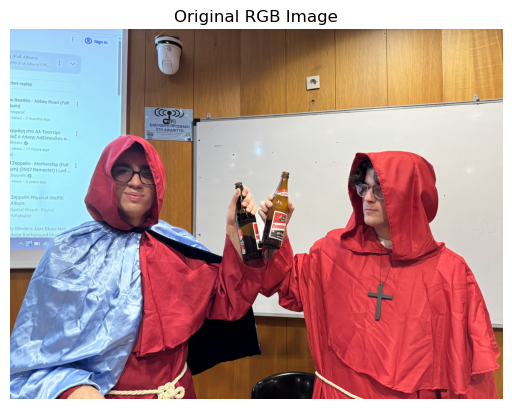

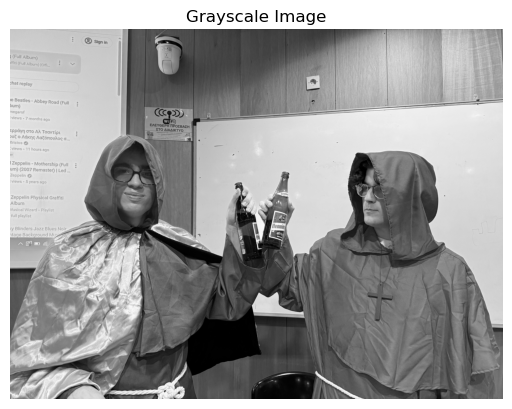

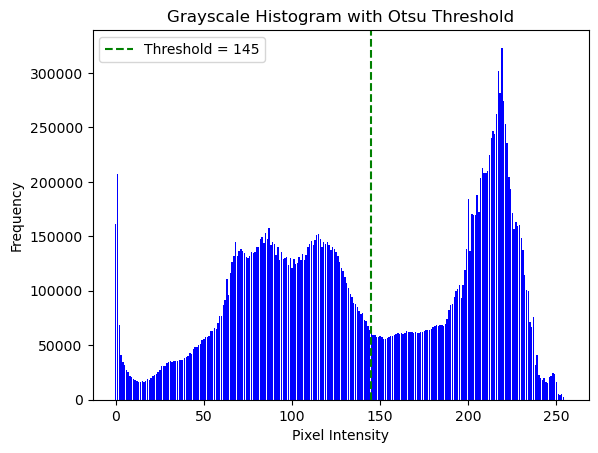

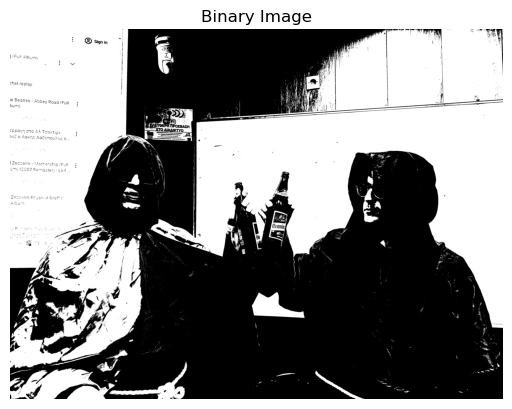

Lower Threshold (Threshold=75): White = 20010359, Black = 4459849
Otsu Threshold (Threshold=145): White = 11246234, Black = 13223974
Higher Threshold (Threshold=215): White = 4267807, Black = 20202401


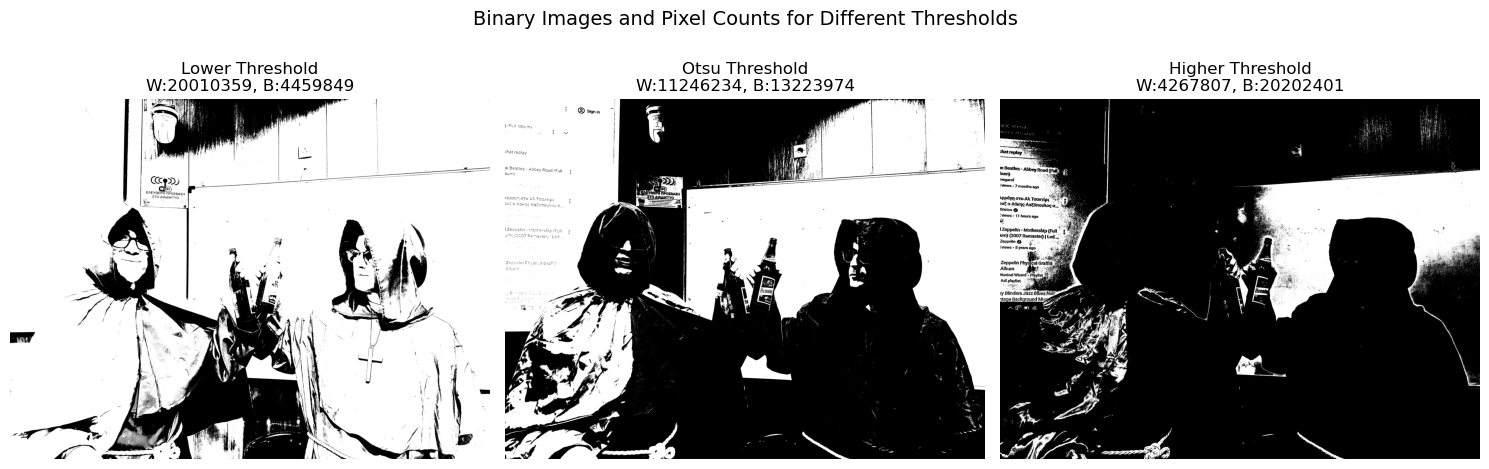

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("C:/Users/nickb/Pictures/halloween.jpeg")

plt.imshow(img)
plt.axis('off')
plt.title("Original RGB Image")
plt.show()


# Convert RGB to Grayscale 
def rgb_to_grayscale(image):
    gray = 0.3 * image[:, :, 0] + 0.6 * image[:, :, 1] + 0.1 * image[:, :, 2]
    return gray

gray_img = rgb_to_grayscale(img)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()



# Compute Histogram and Otsu Threshold
import matplotlib.pyplot as plt

def compute_histogram(image):
    # Ensure grayscale values are integers 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    hist = [0]*256
    for row in img_int:
        for pixel in row:
            hist[pixel] += 1
    return hist
    
#otsu thresh
def otsu_threshold(hist, total_pixels):
    max_var = 0
    threshold = 0
    sum_total = sum(i * hist[i] for i in range(256))
    sum_bg = 0
    weight_bg = 0
    
    for t in range(256):
        weight_bg += hist[t]
        if weight_bg == 0:
            continue
        weight_fg = total_pixels - weight_bg
        if weight_fg == 0:
            break
        
        sum_bg += t * hist[t]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg
        
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg)**2
        if var_between > max_var:
            max_var = var_between
            threshold = t
    return threshold

# Compute histogram
hist = compute_histogram(gray_img)
total_pixels = gray_img.shape[0] * gray_img.shape[1]

threshold = otsu_threshold(hist, total_pixels)
plt.bar(range(256), hist, color='blue')
plt.axvline(x=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Grayscale Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Convert grayscale to binary using threshold
def grayscale_to_binary(image, threshold):
    # Ensure values are in 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    binary_img = [[1 if pixel > threshold else 0 for pixel in row] for row in img_int]
    return binary_img

binary_img = grayscale_to_binary(gray_img, threshold)

plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()


def count_pixels(binary_image):
    white_count = sum(sum(row) for row in binary_image)  # White pixels = 1
    black_count = sum(len(row) - sum(row) for row in binary_image)  # Black pixels = 0
    return white_count, black_count

# Define thresholds: slightly lower, Otsu, slightly higher
thresholds = [max(threshold-70, 0), threshold, min(threshold+70, 255)]
titles = ["Lower Threshold", "Otsu Threshold", "Higher Threshold"]

plt.figure(figsize=(15, 5))

for i, t in enumerate(thresholds):
    # Generate binary image
    temp_binary = grayscale_to_binary(gray_img, t)
    
    white_pixels, black_pixels = count_pixels(temp_binary)
    print(f"{titles[i]} (Threshold={t}): White = {white_pixels}, Black = {black_pixels}")
    
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(temp_binary, cmap='gray')
    plt.title(f"{titles[i]}\nW:{white_pixels}, B:{black_pixels}")
    plt.axis('off')

plt.suptitle("Binary Images and Pixel Counts for Different Thresholds", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


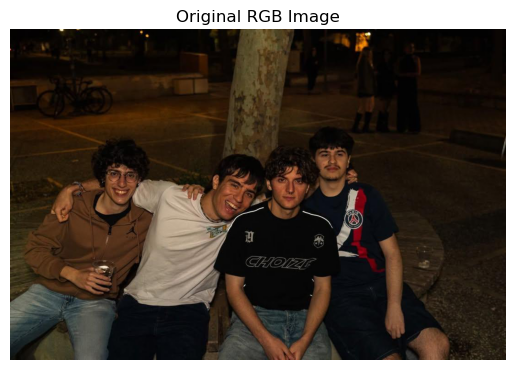

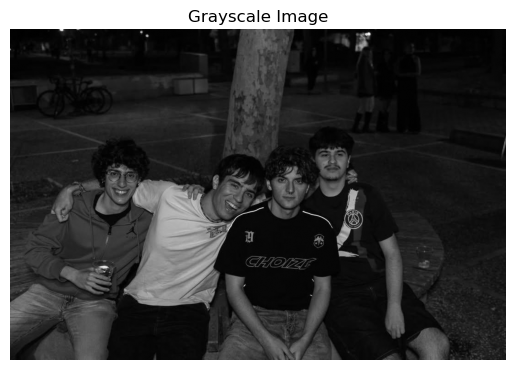

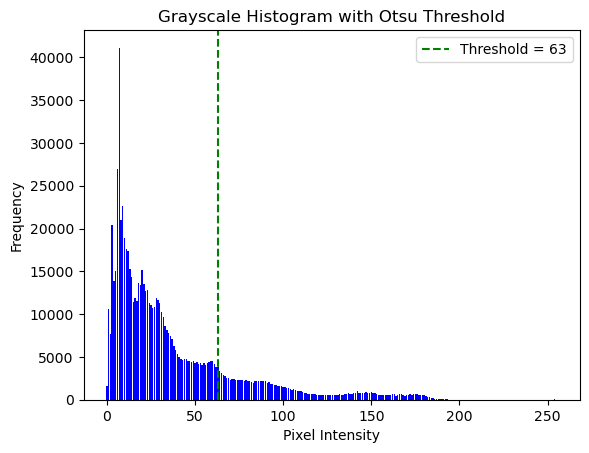

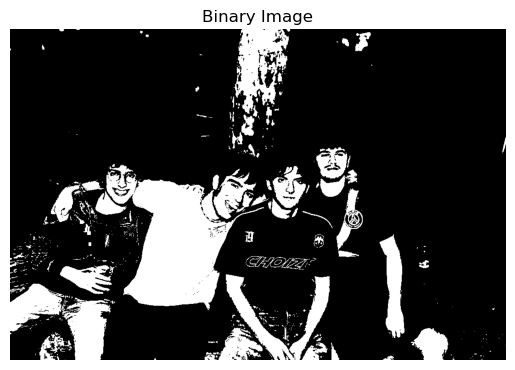

Lower Threshold (Threshold=33): White = 289674, Black = 487926
Otsu Threshold (Threshold=63): White = 140800, Black = 636800
Higher Threshold (Threshold=93): White = 70975, Black = 706625


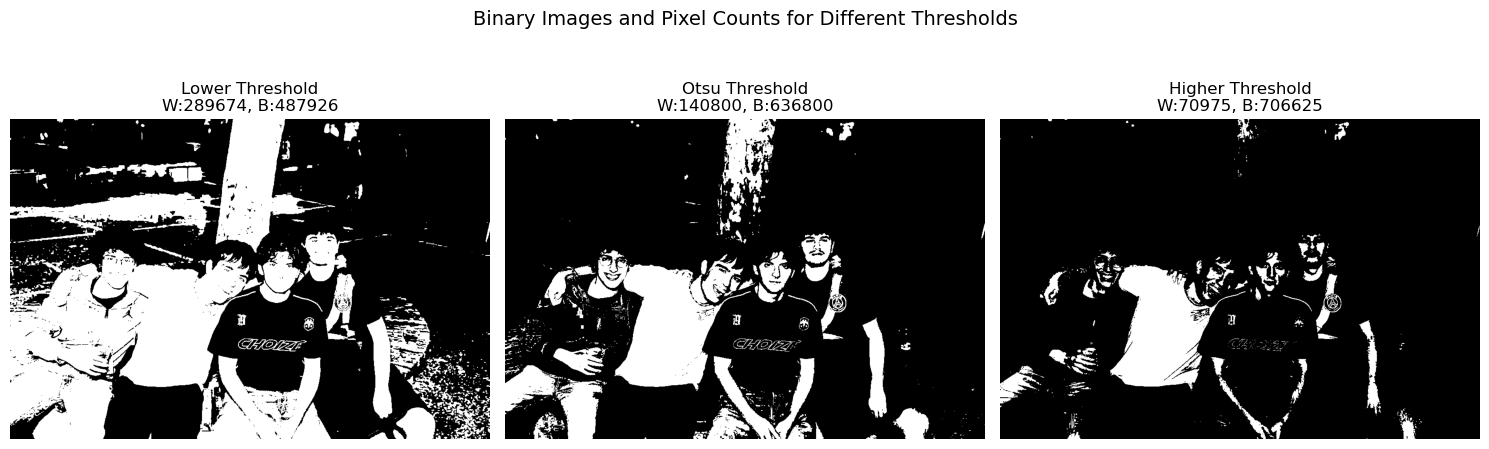

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("C:/Users/nickb/Pictures/pop.jpg")

plt.imshow(img)
plt.axis('off')
plt.title("Original RGB Image")
plt.show()


# Convert RGB to Grayscale 
def rgb_to_grayscale(image):
    gray = 0.3 * image[:, :, 0] + 0.6 * image[:, :, 1] + 0.1 * image[:, :, 2]
    return gray

gray_img = rgb_to_grayscale(img)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title("Grayscale Image")
plt.show()



# Compute Histogram and Otsu Threshold
import matplotlib.pyplot as plt

def compute_histogram(image):
    # Ensure grayscale values are integers 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    hist = [0]*256
    for row in img_int:
        for pixel in row:
            hist[pixel] += 1
    return hist
    
#otsu thresh
def otsu_threshold(hist, total_pixels):
    max_var = 0
    threshold = 0
    sum_total = sum(i * hist[i] for i in range(256))
    sum_bg = 0
    weight_bg = 0
    
    for t in range(256):
        weight_bg += hist[t]
        if weight_bg == 0:
            continue
        weight_fg = total_pixels - weight_bg
        if weight_fg == 0:
            break
        
        sum_bg += t * hist[t]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg
        
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg)**2
        if var_between > max_var:
            max_var = var_between
            threshold = t
    return threshold

# Compute histogram
hist = compute_histogram(gray_img)
total_pixels = gray_img.shape[0] * gray_img.shape[1]

threshold = otsu_threshold(hist, total_pixels)
plt.bar(range(256), hist, color='blue')
plt.axvline(x=threshold, color='green', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Grayscale Histogram with Otsu Threshold")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Convert grayscale to binary using threshold
def grayscale_to_binary(image, threshold):
    # Ensure values are in 0-255
    img_int = (image * 255).astype(int) if image.max() <= 1 else image.astype(int)
    binary_img = [[1 if pixel > threshold else 0 for pixel in row] for row in img_int]
    return binary_img

binary_img = grayscale_to_binary(gray_img, threshold)

plt.imshow(binary_img, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()


def count_pixels(binary_image):
    white_count = sum(sum(row) for row in binary_image)  # White pixels = 1
    black_count = sum(len(row) - sum(row) for row in binary_image)  # Black pixels = 0
    return white_count, black_count

# Define thresholds: slightly lower, Otsu, slightly higher
thresholds = [max(threshold-30, 0), threshold, min(threshold+30, 255)]
titles = ["Lower Threshold", "Otsu Threshold", "Higher Threshold"]

plt.figure(figsize=(15, 5))

for i, t in enumerate(thresholds):
    # Generate binary image
    temp_binary = grayscale_to_binary(gray_img, t)
    
    white_pixels, black_pixels = count_pixels(temp_binary)
    print(f"{titles[i]} (Threshold={t}): White = {white_pixels}, Black = {black_pixels}")
    
    
    plt.subplot(1, 3, i + 1)
    plt.imshow(temp_binary, cmap='gray')
    plt.title(f"{titles[i]}\nW:{white_pixels}, B:{black_pixels}")
    plt.axis('off')

plt.suptitle("Binary Images and Pixel Counts for Different Thresholds", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()
